In [4]:
import torch, os
import numpy as np
from importlib import reload
os.chdir("/home/gibson/sdb2/cola/ass/balls/2019-hackathon-ocr-wymbah")

In [176]:
import nets.ctcnet
reload(nets.ctcnet)
from nets.ctcnet import *

import util.beam
reload(util.beam)
from util.beam import BeamSearch

from util.file import FileHolder
fh = FileHolder()

from util.chars import chars, nchars, idx

In [184]:
def to_tensor(buf):
  buf -= 0.5
  buf *= 2
  #buf -= np.mean(buf, axis=(0, 1, 2))[None, None, None, :]
  #buf /= np.std(buf, axis=(0, 1, 2))[None, None, None, :]
  #buf -= np.array([0.485, 0.456, 0.406])[None, None, None, :]
  #buf /= np.array([0.229, 0.224, 0.225])[None, None, None, :]
  return torch.tensor(buf, dtype=torch.float32).permute(0, 3, 1, 2)

def get_batch(batchsize, validation=False):
  inp, outp = fh.get_batch(batchsize, validation)
  inp = np.stack(inp)
  inp = to_tensor(inp)
  return inp, outp

ctcmodel = CTCModel().cuda()
checkpoint = torch.load("checkpoint-0028-0.62-CNNModel")
ctcmodel.load_state_dict(checkpoint['ctcmodel'])
ctcmodel.eval()

def getone():
    inp, outp = get_batch(1, validation=True)
    log = ctcmodel(inp)
    log = log.detach().cpu().numpy()
    return inp, outp, log

import matplotlib.pyplot as p

def show(inp):
    #print(outp[0])
    p.imshow(inp.squeeze(0).permute(1, 2, 0))
    p.show()

In [178]:
def beam(log, nbeams):
    beas = BeamSearch(nbeams)
    for j in range(log.shape[1]):
        beas.add_logit(log[0, j, :])
    return beas.topbeams()

In [189]:
def tets():
    inp, outp, log = getone()
    answer = beam(log, 64)
    if answer[0].str() != outp[0]:
        print("beams:", answer)
        print("correct:", outp)
        show(inp)
        return 0
    else:
        return 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(8,00 , -0.0394), beam(8,000 , -3.6388), beam(8,.00 , -6.1154), beam(8,500 , -6.1344), beam(,00 , -6.3639), beam(86,00 , -7.1005), beam(85,00 , -7.1540), beam(9,00 , -7.1639), beam(8,0,00 , -7.3741), beam(80,00 , -7.7469), beam(8,0500 , -7.8083), beam(8,,00 , -7.9074), beam(8,200 , -8.0187), beam(8,600 , -8.0503), beam(89,00 , -8.2844), beam(98,00 , -8.4148), beam(8,0 , -8.6148), beam(8,050 , -8.9760), beam(8.,00 , -9.0718), beam(,000 , -9.9714), beam(88,00 , -10.2083), beam(8,0,0 , -10.4524), beam(6,00 , -10.6267), beam(86,000 , -10.7083), beam(85,000 , -10.7617), beam(8,005 , -10.8929), beam(9,000 , -10.9530), beam(8,0.00 , -11.0066), beam(8,.,00 , -11.1787), beam(80,000 , -11.5364), beam(5,00 , -11.5804), beam(8,.000 , -11.6746), beam(8,0200 , -11.6798), beam(8,6,00 , -11.7546), beam(8,00, , -11.7934), beam(8,00. , -11.8057), beam(8,5,00 , -11.9623), beam(89,000 , -12.0725), beam(68,00 , -12.2413), beam(8,5000 , -12.2990), beam(98,000 , -12.3092), beam(84,00 , -12.3909),

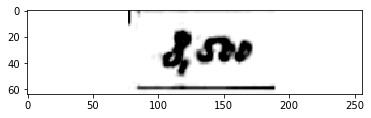

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(15 , -0.0005), beam(135 , -8.6419), beam(185 , -9.6336), beam(158 , -9.7910), beam(-15 , -9.9632), beam(150 , -10.5143), beam(1-5 , -10.6315), beam(1.5 , -10.9742), beam(315 , -11.2180), beam(155 , -11.4819), beam(915 , -11.5138), beam(153 , -11.6845), beam(165 , -11.7013), beam(815 , -12.2335), beam(156 , -12.3124), beam(152 , -12.3211), beam(159 , -12.4195), beam(5 , -12.5399), beam(195 , -12.6045), beam(1,5 , -12.6424), beam(175 , -12.7944), beam(153, -13.0348), beam(105 , -13.0480), beam(115 , -13.1092), beam(159, -13.1291), beam(15. , -13.2341), beam(715 , -13.2969), beam(125 , -13.3884), beam(151 , -13.5392), beam(145 , -13.6370), beam(15, , -13.8513), beam(215 , -13.8616), beam(1 , -13.8685), beam(15- , -13.8920), beam(18 , -14.1562), beam(157 , -14.9479), beam(.15 , -15.2314), beam(158, -15.5341), beam(-5 , -15.6799), beam(515 , -15.7610), beam(615 , -15.9750), beam(15-, -16.1188), beam(16 , -16.5274), beam(154 , -16.8682), beam(415 , -17.2617), beam(151, -17.9854)

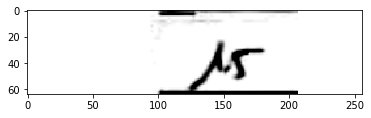

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(137.3 , -0.6631), beam(137.93 , -1.1771), beam(137.63 , -1.8869), beam(137.43 , -4.9271), beam(137.83 , -4.9709), beam(137.9.3 , -6.1709), beam(137.6.3 , -6.8582), beam(137..3 , -7.0518), beam(1137.3 , -7.2882), beam(1347.3 , -7.5623), beam(1372.3 , -7.7943), beam(1137.93 , -7.8002), beam(1374.3 , -7.8387), beam(1347.93 , -8.0743), beam(1372.93 , -8.3226), beam(1374.93 , -8.3553), beam(137.693 , -8.3644), beam(137.53 , -8.4451), beam(1137.63 , -8.5085), beam(137.33 , -8.5531), beam(137.963 , -8.7744), beam(1347.63 , -8.7826), beam(137.2.3 , -8.9212), beam(137.7.3 , -8.9619), beam(1372.63 , -9.0309), beam(1374.63 , -9.0636), beam(137.293 , -9.5884), beam(137.793 , -9.6291), beam(137.983 , -9.7101), beam(137.4.3 , -9.7132), beam(137. , -9.8099), beam(137.,.3 , -9.8737), beam(137.9 , -10.0779), beam(137.23 , -10.1280), beam(137.,93 , -10.2254), beam(137.263 , -10.2967), beam(137.8.3 , -10.3135), beam(137.763 , -10.3373), beam(137.31 , -12.2528), beam(137.931 , -12.7668), beam

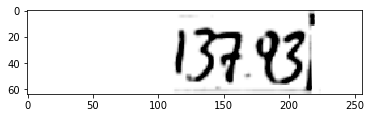

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(10,200 , -0.5524), beam(10,00 , -1.0366), beam(10,.00 , -4.2239), beam(0,200 , -4.4975), beam(0,00 , -5.0013), beam(10,700 , -5.4617), beam(105,200 , -5.6460), beam(150,200 , -5.6505), beam(105,00 , -6.1215), beam(150,00 , -6.1260), beam(1,200 , -6.2475), beam(1,0,200 , -6.3066), beam(110,200 , -6.6407), beam(1,00 , -6.7230), beam(1,0,00 , -6.7821), beam(110,00 , -7.1162), beam(-10,200 , -7.3731), beam(100,200 , -7.4081), beam(710,200 , -7.6317), beam(10,400 , -7.7312), beam(15,200 , -7.8316), beam(-10,00 , -7.8485), beam(100,00 , -7.8835), beam(10,.200 , -8.0334), beam(710,00 , -8.1071), beam(0,.00 , -8.2038), beam(130,200 , -8.2566), beam(15,00 , -8.3071), beam(10,2,00 , -8.3117), beam(10.,200 , -8.4303), beam(-0,200 , -8.6486), beam(190,200 , -8.6572), beam(10,2020 , -8.7145), beam(106,200 , -8.7291), beam(130,00 , -8.7320), beam(1-0,200 , -8.7454), beam(10,,00 , -8.7959), beam(10,20,0 , -8.8119), beam(10,2500 , -8.8713), beam(120,200 , -8.9016), beam(170,200 , -8.9022)

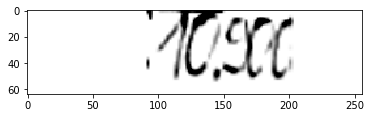

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(137.3 , -0.8737), beam(137.93 , -1.2800), beam(137.63 , -1.3382), beam(137.83 , -3.5159), beam(137.43 , -5.6030), beam(137.53 , -6.0804), beam(1337.3 , -7.1251), beam(137.33 , -7.4976), beam(1337.93 , -7.5318), beam(1337.63 , -7.5898), beam(1372.3 , -7.7858), beam(1372.93 , -8.2364), beam(1372.63 , -8.2944), beam(137..3 , -8.3765), beam(1347.3 , -8.5970), beam(1347.93 , -9.0035), beam(1347.63 , -9.2322), beam(137.293 , -9.2525), beam(1374.3 , -9.2986), beam(137.263 , -9.3105), beam(137.2.3 , -9.7198), beam(137.23 , -9.8626), beam(137.,3 , -9.8839), beam(137.,93 , -9.9401), beam(1374.93 , -9.9634), beam(137.,63 , -9.9982), beam(1374.63 , -10.0215), beam(137.983 , -10.0222), beam(137.9.3 , -10.0607), beam(137.683 , -10.0801), beam(137.6.3 , -10.1186), beam(137.,.3 , -10.1574), beam(137.693 , -10.1730), beam(1337.83 , -10.1916), beam(137.933 , -10.2424), beam(137,.3 , -10.4416), beam(13793 , -10.4687), beam(13763 , -10.4715), beam(1376.3 , -10.4752), beam(137. , -10.5323), be

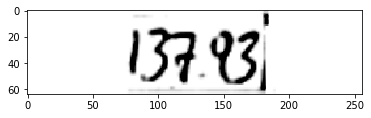

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(13.6 , -0.1178), beam(13..6 , -2.8268), beam(13.2.6 , -4.0783), beam(132.6 , -4.3674), beam(13. , -4.5688), beam(13.26 , -6.1910), beam(13.7.6 , -6.2983), beam(13.8 , -6.9914), beam(13.,6 , -7.1478), beam(137.6 , -7.2230), beam(13.. , -7.2410), beam(13.76 , -7.2421), beam(136 , -7.5644), beam(13.5 , -7.7190), beam(13.46 , -8.1795), beam(13.9 , -8.2316), beam(13.,.6 , -8.3898), beam(1326 , -8.4586), beam(13.2. , -8.5195), beam(113.6 , -8.5511), beam(13.6.6 , -8.6288), beam(13,.6 , -8.6734), beam(132. , -8.8161), beam(134.6 , -9.0717), beam(136.6 , -9.4485), beam(13.68 , -9.4968), beam(13.4.6 , -9.6464), beam(13..8 , -9.6979), beam(13., , -9.7557), beam(13.6. , -9.8213), beam(13.65 , -10.2408), beam(1.6 , -10.2854), beam(13..5 , -10.4256), beam(13.4 , -10.5318), beam(1376 , -10.6300), beam(13.0.6 , -10.6491), beam(130.6 , -10.6793), beam(13.2 , -10.7020), beam(1327.6 , -10.7483), beam(139.6 , -10.7518), beam(13.7. , -10.7889), beam(13..9 , -10.9382), beam(13.2.8 , -10.9494),

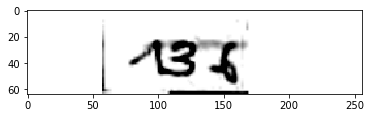

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(10,00, -0.1742), beam(10,0 , -3.0079), beam(10,000, -3.9450), beam(0,00, -4.1344), beam(10,00 , -4.2401), beam(170,00, -4.8236), beam(10,.00, -4.9970), beam(10,200, -5.0411), beam(10,400, -5.3044), beam(10,0, -5.5755), beam(105,00, -5.7819), beam(130,00, -5.9722), beam(150,00, -6.0698), beam(1-0,00, -6.2145), beam(10,600, -6.6930), beam(70,00, -6.7341), beam(710,00, -6.7625), beam(1,0,00, -6.7826), beam(0,0 , -6.9708), beam(10,900, -7.1207), beam(100,00, -7.2582), beam(1,00, -7.3644), beam(10,020, -7.5765), beam(10,,00, -7.5932), beam(170,0 , -7.6599), beam(190,00, -7.7628), beam(10,.0 , -7.8334), beam(10,20 , -7.8772), beam(-10,00, -7.8891), beam(110,00, -7.8931), beam(0,000, -7.9520), beam(-0,00, -8.1267), beam(10,40 , -8.1408), beam(0,00 , -8.2005), beam(120,00, -8.5981), beam(105,0 , -8.6183), beam(10.,00, -8.6482), beam(10,20, -8.7538), beam(130,0 , -8.8086), beam(10, , -8.8150), beam(170,000, -8.8337), beam(150,0 , -8.9062), beam(170,00 , -8.9065), beam(10,.000, -9.0

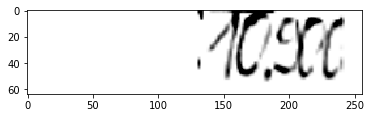

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


beams: [beam(77 , -0.0084), beam(777 , -5.4989), beam(770 , -6.4322), beam(7.7 , -7.1198), beam(7 , -7.5204), beam(727 , -8.0696), beam(775 , -8.4740), beam(771 , -8.8550), beam(772 , -9.4490), beam(747 , -9.6938), beam(77. , -9.7205), beam(774 , -9.7521), beam(277 , -9.9653), beam(779 , -10.1872), beam(773 , -10.4293), beam(77- , -10.5128), beam(7277 , -10.8456), beam(717 , -10.8747), beam(.77 , -10.9346), beam(477 , -11.2207), beam(797 , -11.3377), beam(72 , -11.3932), beam(778 , -11.4662), beam(-77 , -11.4742), beam(74 , -11.5911), beam(177 , -11.6217), beam(7-7 , -11.7689), beam(767 , -11.8825), beam(977 , -11.8934), beam(7770 , -11.9279), beam(7.77 , -11.9895), beam(71 , -12.1875), beam(7477 , -12.2578), beam(7. , -12.7869), beam(779, -12.7918), beam(377 , -12.9008), beam(773, -12.9245), beam(7177 , -13.1135), beam(7- , -13.1245), beam(77.7 , -13.2963), beam(707 , -13.3664), beam(776 , -13.5230), beam(7.70 , -13.5482), beam(7,7 , -13.6011), beam(7-77 , -13.9425), beam(70 , -13.948

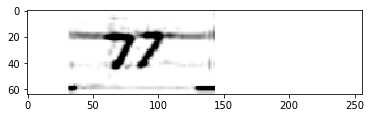

In [190]:
count = sum(tets() for j in range(100)) / 100

In [191]:
count

0.92